## MLP_Tensorflow_digits_res

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import random as r
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf


<Figure size 432x288 with 0 Axes>

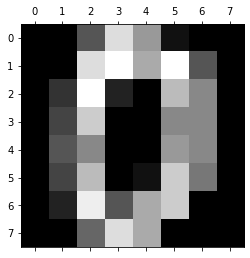

[[0]
 [1]
 [2]
 ...
 [8]
 [9]
 [8]]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [2]:

#importa a base de dígitos em tupla

digits1 = load_digits(return_X_y=True)
# em digits1[0] : vetores da imagem
# em digits1[1] : classes reais das imagens (dígitos)
X=np.array(list(digits1[0]))
Y=np.array(list(digits1[1]))

plt.gray() 
plt.matshow(X[0].reshape((8,8))) 
plt.show() 




enc = OneHotEncoder()
YC=Y.copy()
YR=YC.reshape((-1,1))
print(YR)
enc.fit(YR)
YH=enc.transform(YR).toarray()
print(YH[0])



In [0]:
W = {'hidden': tf.Variable(tf.random_normal([64, 20])),
     'output': tf.Variable(tf.random_normal([20, 10]))}

    
b = {'hidden': tf.Variable(tf.random_normal([20])),
     'output': tf.Variable(tf.random_normal([10]))}

In [0]:
xx = tf.placeholder('float', [None, 64])
yy = tf.placeholder('float', [None, 10])

def rede(xx,W,b):
  hidden = tf.nn.relu(tf.add(tf.matmul(xx, W['hidden']), b['hidden']))
  return tf.add(tf.matmul(hidden, W['output']), b['output'])

model=rede(xx,W,b)
    

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X, YH, test_size=0.30, random_state=42)

In [0]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = model, labels = y_train))
opt = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(loss)

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoca in range(10000):
        sess.run(opt,feed_dict = {xx: X_train, yy: y_train})
        if epoca%100==0:print(epoca,sess.run(loss,feed_dict={xx:X_train,yy:y_train}).mean())
    W_final, b_final = sess.run([W, b])
    ye_train=sess.run(tf.nn.softmax(model),feed_dict = {xx:X_train})
    ye_test=sess.run(tf.nn.softmax(model),feed_dict = {xx:X_test})
    


0 279.17618
100 3.5107982
200 0.9273566
300 0.4528861
400 0.2680829
500 0.18659198
600 0.14325508
700 0.117114194
800 0.10180339
900 0.08867403
1000 0.0786292
1100 0.07153816
1200 0.06617653
1300 0.062068604
1400 0.05906607
1500 0.056588694
1600 0.054321058
1700 0.05268793
1800 0.051260214
1900 0.050025623
2000 0.049028732
2100 0.04816767
2200 0.047396127
2300 0.04666857
2400 0.045907382
2500 0.04528682
2600 0.044764247
2700 0.043423142
2800 0.04231589
2900 0.04179473
3000 0.04136694
3100 0.041008387
3200 0.039938215
3300 0.039327864
3400 0.038939293
3500 0.03858094
3600 0.03727783
3700 0.03666589
3800 0.036180347
3900 0.03573498
4000 0.035370346
4100 0.03499582
4200 0.03473047
4300 0.03270917
4400 0.03223413
4500 0.031987533
4600 0.03175089
4700 0.031514402
4800 0.0315716
4900 0.030376116
5000 0.02951819
5100 0.029069431
5200 0.02873986
5300 0.02847982
5400 0.028129434
5500 0.022636347
5600 0.022034893
5700 0.021726446
5800 0.021567164
5900 0.021413295
6000 0.02087204
6100 0.0204411
6

In [0]:
ye_tr=np.array([np.argmax(y) for y in ye_train])
ye_ts=np.array([np.argmax(y) for y in ye_test])
yt=np.array([np.argmax(y) for y in y_train])
yts=np.array([np.argmax(y) for y in y_test])

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(ye_tr,yt),accuracy_score(ye_ts,yts)


(0.9960222752585521, 0.9111111111111111)